In [1]:
import pybamm
pybamm.settings.heaviside_smoothing = 10
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

from IPython.display import Audio
url = "https://proxy.notificationsounds.com/wake-up-tones/you-have-new-message-484/download/file-a1_ascendent-64kbps.mp3"
#notify=Audio(url = url, autoplay = True)
notify=Audio(filename = "/home/drmrfc/Downloads/echoed-ding-459.mp3", autoplay = True)
########## pickle commands for dumping and retrieving data #######
# filename = 'dogs'
# outfile = open(filename,'wb')
# pickle.dump(dogs_dict,outfile)
# outfile.close()
# infile = open(filename,'rb')
# data = pickle.load(infile)
# infile.close()

########### parallel computations command ####################
# data = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in my_iterable)

In [2]:

experiment = pybamm.Experiment(
    [
        (
            "Discharge at 1 A for 3.2 hours or until 2.2 V",
            "Charge at 1 A for 10 hours or until 2.4 V"
        ),
    ],
)

model16 = pybamm.lithium_sulfur.MarinescuEtAl2016()
sim16 = pybamm.Simulation(
    model16,
    experiment=experiment,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = 10,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
time_in_seconds = 1000
sim16.solve(np.linspace(0, time_in_seconds, int(time_in_seconds/10)))

model18 = pybamm.lithium_sulfur.MarinescuEtAl2018()
sim18 = pybamm.Simulation(
    model18,
    experiment=experiment,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = 10,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
time_in_seconds = 1000
sim18.solve(np.linspace(0, time_in_seconds, int(time_in_seconds/10)))

model19 = pybamm.lithium_sulfur.HuaEtAl2019()
sim19 = pybamm.Simulation(
    model19,
    experiment=experiment,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = 10,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
time_in_seconds = 1000
sim19.solve(np.linspace(0, time_in_seconds, int(time_in_seconds/10)))
notify

2021-05-03 13:24:24,691 - [WARNING] simulation.solve(711): Ignoring t_eval as solution times are specified by the experiment
2021-05-03 13:24:25,594 - [WARNING] simulation.solve(711): Ignoring t_eval as solution times are specified by the experiment
2021-05-03 13:24:26,514 - [WARNING] simulation.solve(711): Ignoring t_eval as solution times are specified by the experiment


# Tests
### The two Marinescu models should have constant temperate while Hua not
### Marinescu et al. (2016) and Hua et al. (2019) should have constant active mass while Marinescu et al. (2018) not


Text(0.5, 1.0, 'Comparison of temperature between chemistry 1 models')

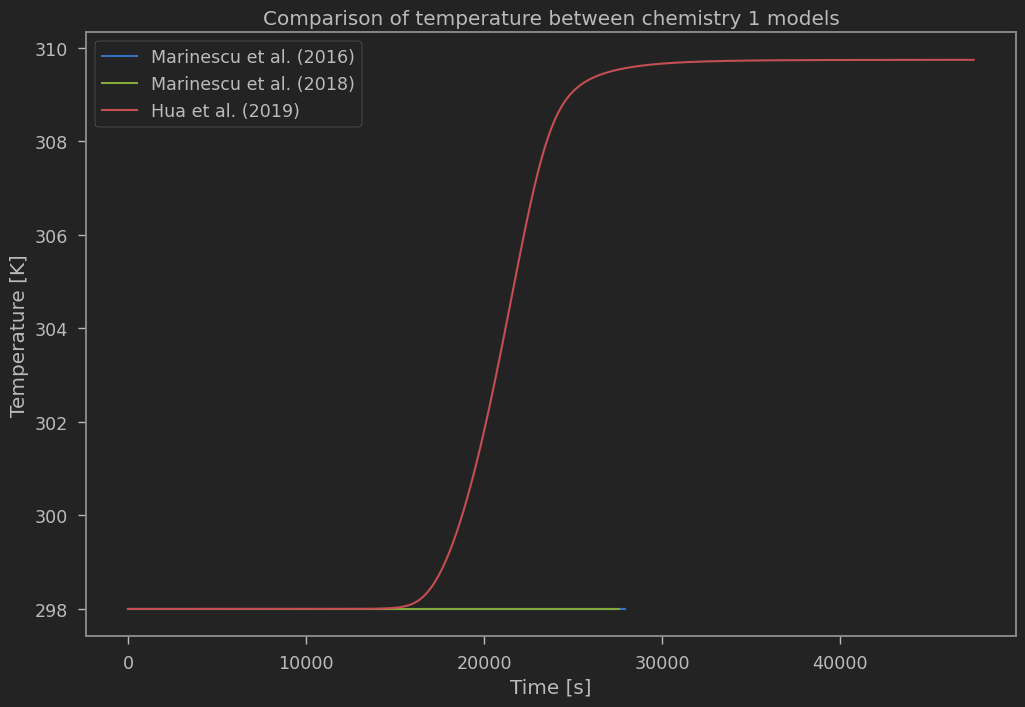

In [3]:
plt.plot(sim16.solution.t, sim16.solution["Cell Temperature [K]"].entries)
plt.plot(sim18.solution.t, sim18.solution["Cell Temperature [K]"].entries)
plt.plot(sim19.solution.t, sim19.solution["Cell Temperature [K]"].entries)
plt.legend(['Marinescu et al. (2016)',
           'Marinescu et al. (2018)',
           'Hua et al. (2019)'])
plt.xlabel("Time [s]")
plt.ylabel("Temperature [K]")
plt.title("Comparison of temperature between chemistry 1 models")

Text(0.5, 1.0, 'Comparison of active mass between chemistry 1 models')

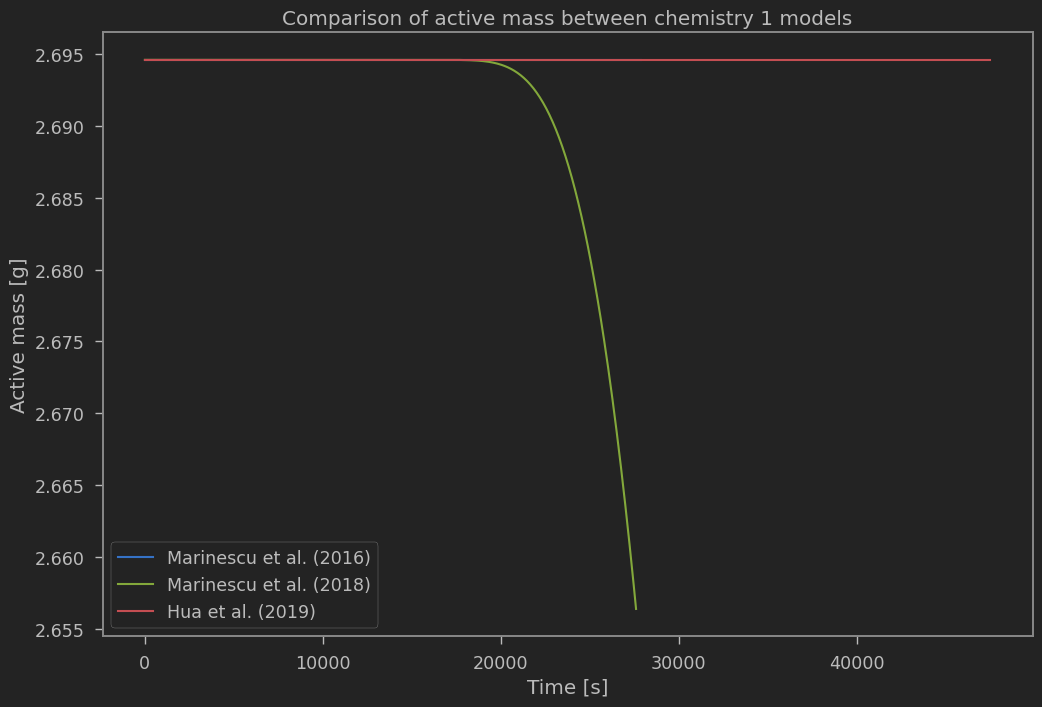

In [4]:
mass16 = sim16.solution['S8 [g]'].entries+sim16.solution['S4 [g]'].entries+sim16.solution['S2 [g]'].entries+sim16.solution['S [g]'].entries+sim16.solution['Precipitated Sulfur [g]'].entries
mass18 = sim18.solution['S8 [g]'].entries+sim18.solution['S4 [g]'].entries+sim18.solution['S2 [g]'].entries+sim18.solution['S [g]'].entries+sim18.solution['Precipitated Sulfur [g]'].entries
mass19 = sim19.solution['S8 [g]'].entries+sim19.solution['S4 [g]'].entries+sim19.solution['S2 [g]'].entries+sim19.solution['S [g]'].entries+sim19.solution['Precipitated Sulfur [g]'].entries

plt.plot(sim16.solution.t, mass16)
plt.plot(sim18.solution.t, mass18)
plt.plot(sim19.solution.t, mass19)
plt.legend(['Marinescu et al. (2016)',
           'Marinescu et al. (2018)',
           'Hua et al. (2019)'])
plt.xlabel("Time [s]")
plt.ylabel("Active mass [g]")
plt.title("Comparison of active mass between chemistry 1 models")